In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import IPython.display
import pandas as pd
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
#from dask.distributed import Client, progress

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

In [55]:
# First load lat and lon
lon = xr.open_mfdataset('Data/ORCA025.L75-OCCITENS.001_ssh_var.nc').nav_lon.drop('nav_lat').drop('nav_lon')
lat = xr.open_mfdataset('Data/ORCA025.L75-OCCITENS.001_ssh_var.nc').nav_lat.drop('nav_lat').drop('nav_lon')

<xarray.DataArray 'nav_lat' (y: 1021, x: 1442)>
dask.array<shape=(1021, 1442), dtype=float32, chunksize=(1021, 1442)>
Dimensions without coordinates: y, x
Attributes:
    axis:           Y
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    nav_model:      grid_T

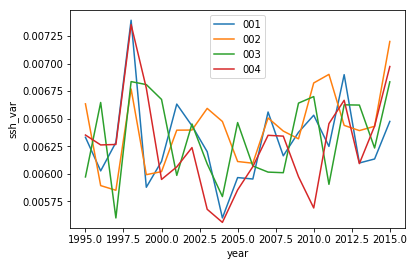

In [78]:
# Open one file.
for ii in [1,2,3,4]:
    i00 = '%03d' % ii
    Member = 'ORCA025.L75-OCCITENS.'+i00
    filename='Data/'+Member+'_ssh_var.nc'
    ssh_var = xr.open_mfdataset(filename).ssh_var
    Pacific_ssh_var = ssh_var.isel(y=slice(179,280)).isel(x=slice(309,861)).mean('x').mean('y')
    Pacific_ssh_var.plot(label=i00)
    
plt.legend()

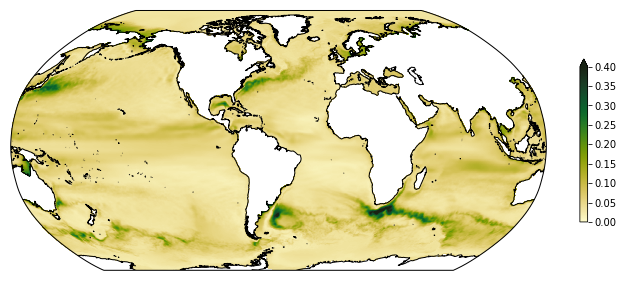

In [63]:
# Plot mean of RMS
sla_rms = ssh_var.mean('year')**0.5

plt.figure(figsize=(12,5))
ax = plt.subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-50))
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.pcolormesh(lon,lat,sla_rms,vmin=0,vmax=0.4,cmap=cm.cm.speed,transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,extend='max')

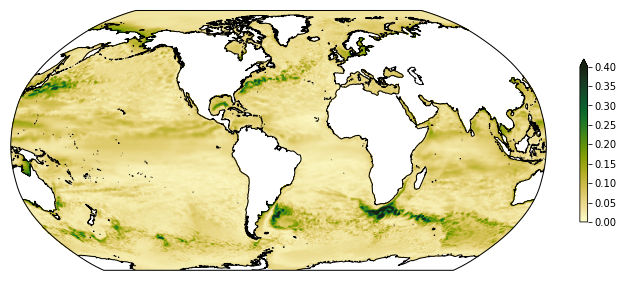

In [73]:
## Plot RMS for a particular year.
sla_rms_year = ssh_var.sel(year=2002)**0.5

plt.figure(figsize=(12,5))
ax = plt.subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-50))
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.pcolormesh(lon,lat,sla_rms_year,vmin=0,vmax=0.4,cmap=cm.cm.speed,transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,extend='max')

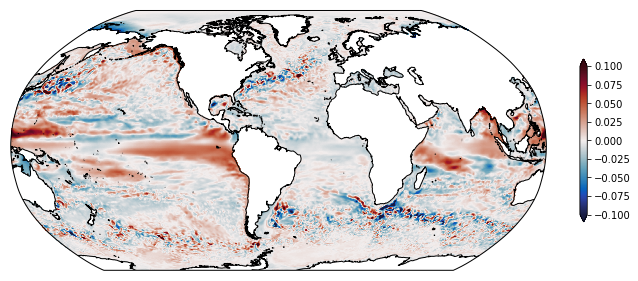

In [70]:
## Plot difference between year and mean for this member
sla_rms_diff  = sla_rms_year - sla_rms

plt.figure(figsize=(12,5))
ax = plt.subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-50))
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.pcolormesh(lon,lat,sla_rms_diff,vmin=-0.1,vmax=0.1,cmap=cm.cm.balance,transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,extend='both')

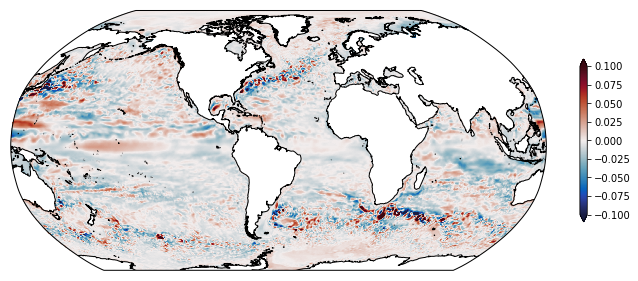

In [74]:
## Plot difference between year and mean for this member
sla_rms_diff  = sla_rms_year - sla_rms

plt.figure(figsize=(12,5))
ax = plt.subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-50))
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.pcolormesh(lon,lat,sla_rms_diff,vmin=-0.1,vmax=0.1,cmap=cm.cm.balance,transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.6,extend='both')

## Used in Hogg et al. (2015)
* Indian Ocean: 40-50E, 57-44S
* Pacific Ocean: 150-288E [309-861], 62-48S [179-279]
* Atlantic Ocean: 325E-10E,56-46S

In [61]:
ssh_var

<xarray.DataArray 'ssh_var' (year: 21, y: 1021, x: 1442)>
dask.array<shape=(21, 1021, 1442), dtype=float32, chunksize=(21, 1021, 1442)>
Coordinates:
    nav_lat  (y, x) float32 dask.array<shape=(1021, 1442), chunksize=(1021, 1442)>
    nav_lon  (y, x) float32 dask.array<shape=(1021, 1442), chunksize=(1021, 1442)>
  * year     (year) int64 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 ...
Dimensions without coordinates: y, x

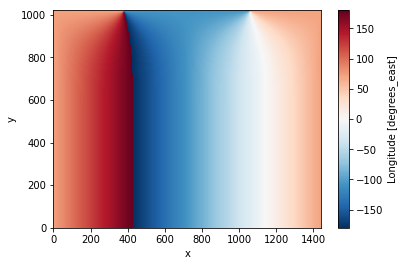

In [75]:
lon.plot()

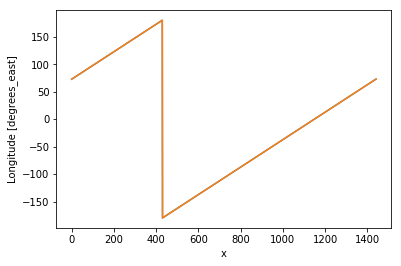

In [77]:
lon[0,:].plot()
lon[512,:].plot()